# 임산부석에 임산부는 얼마나 앉을까?  

### 부제 : 임산부석에 앉는 당신을 지켜보고 있다
지하철 내 임산부 좌석을 배려석으로 볼 것 인가? 임산부 전용 좌석으로 볼 것인가? \
임산부석에 대한 사회적 합의가 완전하게 이루어지지 않은 지금, 다양한 방식으로 임산부석을 둘러싼 갈등이 표출되고 있다. \
이에 데잇걸즈 3기 한단비, 이보민, 전재민, 윤한솔, 이미현, 박현미는 실제 임산부석 이용자와 열차 내의 다양한 요소를 \
관찰하여 얻은 데이터로 열차내 환경 및 임산부석 좌석 이용자에 관한 분석을 실시하였다.

## 가설
### 관찰로 얻은 데이터를 통해 알 수 있는 정보는 어떤 것이 있을까?
1. 전체 임산부석 착석자 중 실제 임산부 비율
2. 임산부석 착석자 성별 
3.  임산부석 착석자의 행동
4.  붐빔정도와 임산부석 착석과의 상관관계
5.  호선별 임산부석이 비어있는 비율
6.  노년 이용자의 임산부석 착석과 노약자석 빈자리 여부의 관계
7.  무거운 짐의 여부와 임산부석 착석자의 상관 관계
8. 일반석이 남아있을때 임산부석에 앉아있는 사람의 성별, 나이대 등의 정보

# 데이터 수집방법
 지하철을 이용하는 팀원이 탑승하는 칸 내의 임산부석(각 칸에 2좌석)을 관찰, 탑승자 및 비어있는 구간과 열차내 붐빔 정도 등을 직접 시트에 입력
 
### 수집 기간 : 2019-07-31 ~ 2019-08-16
### 수집의한계
시간대가 모두 출퇴근 시간 \
호선의 다양성이 없다\
임산부 뱃지가 없으면 임산부인지 알기 힘듦\
노약자석이 잘 안 보인다

In [204]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles

import math
import statistics
from collections import Counter
import matplotlib
print(matplotlib.__version__)

import requests
from ipywidgets import Image

3.1.0


In [205]:
table = pd.read_csv('data_pregnant.csv')

![img](https://i.imgur.com/ru0w38v.png)

# Data description

### 기록
1. date : 기록 날짜
2. time : 기록 시간
3. line :탑승 호선
4. start :탑승역
5. stop :하차역

### 붐빔 정도 
6. crowdedness : E,N,F로 분류
7. E : 널널 :남은 좌석이 있는 경우
8. N : 보통 (20명이하)
9. F : 가득참 (20명이상)
10. old_age_seat

### 임산부석 착석 여부 및 성별
11. is_empty : 빈자리
12. Female :착석자 성별이 여성
13. Male :착석자 성별이 남성
14. isempty_station : 임산부석이 비어있는 상태로 지나간 역의 개수

### 착석자 연령
15. age : 착석자 연령 칼럼 (어린이,청소년,청년,중년,노년)
16. child : 어린이 ~13살
17. teenage : 청소년 14~19살
18. Youth : 청년 20, 30대
19. middle_age : 중년 65세 이전
20. old_age : 노년 65세 이후

### 착석자 임신여부
21. badge :  임산부 엠블럼 소지 여부
22. pregnant : 임신 여부

### 짐 여부
23. heavy : 무거운 짐을 가지고 있는지 여부

### 착석자 행동
24. behavior1 : 행동 종류 1
25. behavior2: 행동 종류 2
26. behavior3 :행동 종류 3 **한 사람이 여러 행동을 했을 경우*
27. cellphone : 핸드폰을 이용함
28. thinking : 멍
29. sleep :잠
30. earphone : 이어폰 사용
31. talking : 이야기 함
32. calling : 전화통화
33. reading : 무엇인가를 읽음
34. makeup : 화장하기
35. eating : 먹기
36. writing : 무엇인가를 작성하기

In [206]:
table.head(2)

,date,time,line,start,stop,count_station,time.1,crowdedness,E,N,...,cellphone,thinking,sleep,earphone,talking,calling,reading,makeup,eating,writing
0,2019. 7. 31.,19:10:00,5.0,공덕,여의도,3.0,6.0,N,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019. 7. 31.,19:21:00,9.0,여의도,신논현,10.0,20.0,F,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
table .dtypes

date              object
time              object
line             float64
start             object
stop              object
count_station    float64
time.1           float64
crowdedness       object
E                float64
N                float64
F                float64
old_age_seat     float64
is_empty         float64
empty_count      float64
female           float64
male             float64
age               object
child            float64
teenage          float64
youth            float64
middle_age       float64
old_age          float64
badge            float64
pregnant         float64
heavy            float64
behavior1         object
behavior2         object
behavior3         object
cellphone        float64
thinking         float64
sleep            float64
earphone         float64
talking          float64
calling          float64
reading          float64
makeup           float64
eating           float64
writing          float64
dtype: object

In [208]:
table ["date"] = pd.to_datetime(table ['date']) #날짜 데이터 타입 변경

In [209]:
# 데이터가 언제부터 언제까지 있는지? min(), max() 함수
print('데이터 기록 기간')
print('시작:',(table['date']).min())
print('끝:',(table['date']).max())

데이터 기록 기간
시작: 2019-07-31 00:00:00
끝: 2019-08-16 00:00:00


In [210]:
# 데이터의 총 갯수
print('데이터의 총 갯수 : ',(len(table['date'])))

데이터의 총 갯수 :  834


---
# A part : 임산부석 이용자 분석
# 1. 임산부석 착석자 분석

In [211]:
print('관찰한 좌석 수 : ',(len(table['date'])))
print('비어있는 좌석 수:',table[table['is_empty']==0]['is_empty'].count(),'개, 전체 중',round(len(table[table['is_empty']==0]) / len(table) * 100),'%') #비어있는 좌석 수
print('착석자가 있는 좌석 수:',table[table['is_empty']==1]['is_empty'].count(),'개, 전체 중',round(len(table[table['is_empty']==1]) / len(table) * 100),'%') 

관찰한 좌석 수 :  834
비어있는 좌석 수: 576 개, 전체 중 69 %
착석자가 있는 좌석 수: 257 개, 전체 중 31 %


## 1-1. 임산부석 착석한 임산부 분석

In [212]:
# full: 임산부석에 착석자가 있는 행만 뽑은 테이블
full = table[table['is_empty']==0]

print('착석자가 있는 좌석 수 257개 중', len(full[full['pregnant']==1]),'개 좌석이 임산부, 총',round(len(full[full['pregnant']==1]) / len(full) * 100),'%')


착석자가 있는 좌석 수 257개 중 26 개 좌석이 임산부, 총 5 %


## 1-1-1. 임산부석 착석한 임산부 분석 -  임산부석을 이용한 임산부 중 26명 중 앰블럼 소지자는 16명(61%)

In [213]:
num_prg= table[table["pregnant"] == 1]["pregnant"].count()

In [214]:
table[table["pregnant"] == 1]["pregnant"].count()

26

In [215]:
num_prg_bdg = table[table["badge"] == 1]["badge"].count()

In [216]:
table[table["badge"] == 1]["badge"].count()

16

In [217]:
num_prg_bdg/num_prg

0.6153846153846154

----
## 1-2. 임산부석 착석한 비임산부 분석

## 1-2-1. 비임산부 착석자 성별

In [218]:
# 성별
print('여성 착석자 수:', len(full[full['female']==1]),'명')
print('여성 착석 비율:', round(len(full[full['female']==1])/len(full)*100),'%')
print('남성 착석자 수:', len(full[full['male']==1]),'명')
print('남성 착석 비율:', round(len(full[full['male']==1])/len(full)*100),'%')

여성 착석자 수: 448 명
여성 착석 비율: 78 %
남성 착석자 수: 128 명
남성 착석 비율: 22 %


## 1-2-2. 비임산부 착석자 나이

In [219]:
# 연령대 (인원 수, 단위 : 명)
full.groupby('age')['date'].count()

age
노년     100
어린이     11
중년     231
청년     228
청소년      6
Name: date, dtype: int64

In [220]:
# 연령대 (비율)
full.groupby('age')['date'].count().apply(lambda x: x / len(full) * 100)

age
노년     17.361111
어린이     1.909722
중년     40.104167
청년     39.583333
청소년     1.041667
Name: date, dtype: float64

## 1-2-3. 비임산부 착석자가 무거운 짐을 가지고 있는지 여부

In [221]:
# 무거운 짐을 갖고 있는  인원 수 (0:짐 없음 , 1:노트북이 들어가는 정도를 포함한 그 이상의 짐을 가지고 있음)
full['heavy'].value_counts()

0.0    383
1.0    192
Name: heavy, dtype: int64

In [222]:
# 무거운 짐을 갖고 있는 비율  (0:짐 없음 , 1:노트북이 들어가는 정도를 포함한 그 이상의 짐을 가지고 있음)
full['heavy'].value_counts().apply(lambda x: x / len(full) * 100)

0.0    66.493056
1.0    33.333333
Name: heavy, dtype: float64

## 1-2-4. 비임산부 나이별 행동

In [223]:
# 행동
full.groupby('behavior1')['date'].size().apply(lambda x: x / len(full) *100)

behavior1
대화      5.208333
독서      1.041667
먹기      0.520833
멍      16.493056
이어폰     5.208333
잠      13.541667
통화      1.388889
필기      0.520833
핸드폰    52.083333
화장      0.520833
Name: date, dtype: float64

In [224]:
full.groupby('behavior2')['date'].size()

behavior2
대화      2
독서      1
먹기      1
멍       4
이어폰    30
잠      10
핸드폰    16
Name: date, dtype: int64

In [225]:
full.groupby('behavior3')['date'].size()

behavior3
잠    1
Name: date, dtype: int64

---
# 2. 열차칸 상황과 임산부석 관계

## 2-1. 붐빔정도와 임산부석 착석 여부

In [226]:
full.groupby('crowdedness')['date'].size()

crowdedness
E     73
F    266
N    237
Name: date, dtype: int64

In [227]:
table.groupby(['crowdedness','is_empty'])['date'].size()

crowdedness  is_empty
E            0.0          73
             1.0         118
F            0.0         266
             1.0          45
N            0.0         237
             1.0          94
Name: date, dtype: int64

In [228]:
table[table['E']==1].groupby('is_empty')['date'].size().apply(lambda x: x/len(table[table['E']==1])*100)

is_empty
0.0    38.219895
1.0    61.780105
Name: date, dtype: float64

In [229]:
table[table['N']==1].groupby('is_empty')['date'].size().apply(lambda x: x/len(table[table['N']==1])*100)

is_empty
0.0    71.601208
1.0    28.398792
Name: date, dtype: float64

In [230]:
table[table['F']==1].groupby('is_empty')['date'].size().apply(lambda x: x/len(table[table['F']==1])*100)

is_empty
0.0    85.530547
1.0    14.469453
Name: date, dtype: float64

## 2-1-1. 붐빔정도와 임산부석 착석 여부 - 호선별

In [231]:
# 임산부가 아닌 착석자 테이블 생성
not_empty = table[table['is_empty']== 0]

In [232]:
not_pregnant = not_empty[not_empty['pregnant'] == 0]

In [233]:
not_pregnant['pregnant'].unique()

array([0.])

In [234]:
#전체 숫자 확인
pd.DataFrame(not_pregnant.groupby(['line','crowdedness'])['date'].size()).rename(columns={'date':'count_people'})

count_people
line crowdedness              
1.0  E                      23
     F                      99
     N                      86
2.0  E                       1
     N                       4
3.0  F                       1
5.0  E                      14
     F                      63
     N                      59
6.0  E                       9
     F                      15
     N                      53
7.0  E                      12
     F                      24
     N                      15
9.0  E                       1
     F                       5
     N                       2
10.0 E                       6
     F                      44
     N                      11
11.0 F                       3

In [235]:
# 각 호선별 붐빔정도에 따라 퍼센트를 구해줄 수 있는 함수 작성
def func_percentage(line):
    percentage = []
    for i in line['crowdedness'].unique():
        percentage.append(round(float(line[line['crowdedness'] == i]['count_people'])/line['count_people'].sum()*100,2))
    return percentage

In [236]:
# 라인별 착석자수로 이루어진 새로운 테이블 생성
# 퍼센트를 담을 list 생성
lines_total_counts = pd.DataFrame(not_pregnant.groupby(['line','crowdedness'])['date'].size()).reset_index().rename(columns={'date':'count_people'})
lines_total_counts

,line,crowdedness,count_people
0,1.0,E,23
1,1.0,F,99
2,1.0,N,86
3,2.0,E,1
4,2.0,N,4
5,3.0,F,1
6,5.0,E,14
7,5.0,F,63
8,5.0,N,59
9,6.0,E,9


In [237]:
lines_p_list = []

In [238]:
# 1호선
line1 = lines_total_counts[lines_total_counts['line'] == 1].copy()
line1['people_percentage'] = func_percentage(line1)
line1

,line,crowdedness,count_people,people_percentage
0,1.0,E,23,11.06
1,1.0,F,99,47.60
2,1.0,N,86,41.35


In [239]:
# 2호선
line2 = lines_total_counts[lines_total_counts['line'] == 2].copy()
line2['people_percentage'] = func_percentage(line2)
line2

,line,crowdedness,count_people,people_percentage
3,2.0,E,1,20.0
4,2.0,N,4,80.0


In [240]:
# 3호선
line3 = lines_total_counts[lines_total_counts['line'] == 3].copy()
line3['people_percentage'] = func_percentage(line3)
line3

,line,crowdedness,count_people,people_percentage
5,3.0,F,1,100.0


In [241]:
# 5호선
line5 = lines_total_counts[lines_total_counts['line'] == 5].copy()
line5['people_percentage'] = func_percentage(line5)
line5

,line,crowdedness,count_people,people_percentage
6,5.0,E,14,10.29
7,5.0,F,63,46.32
8,5.0,N,59,43.38


In [242]:
# 6호선
line6 = lines_total_counts[lines_total_counts['line'] == 6].copy()
line6['people_percentage'] = func_percentage(line6)
line6

,line,crowdedness,count_people,people_percentage
9,6.0,E,9,11.69
10,6.0,F,15,19.48
11,6.0,N,53,68.83


In [243]:
# 7호선
line7 = lines_total_counts[lines_total_counts['line'] == 7].copy()
line7['people_percentage'] = func_percentage(line7)
line7

,line,crowdedness,count_people,people_percentage
12,7.0,E,12,23.53
13,7.0,F,24,47.06
14,7.0,N,15,29.41


In [244]:
# 9호선
line9 = lines_total_counts[lines_total_counts['line'] == 9].copy()
line9['people_percentage'] = func_percentage(line9)
line9

,line,crowdedness,count_people,people_percentage
15,9.0,E,1,12.5
16,9.0,F,5,62.5
17,9.0,N,2,25.0


In [245]:
# 분당선
line10 = lines_total_counts[lines_total_counts['line'] == 10].copy()
line10['people_percentage'] = func_percentage(line10)
line10

,line,crowdedness,count_people,people_percentage
18,10.0,E,6,9.84
19,10.0,F,44,72.13
20,10.0,N,11,18.03


In [246]:
# 경의중앙선
line11 = lines_total_counts[lines_total_counts['line'] == 11].copy()
line11['people_percentage'] = func_percentage(line11)
line11

,line,crowdedness,count_people,people_percentage
21,11.0,F,3,100.0


In [247]:
for i in lines_total_counts['line'].unique():
    percentages = func_percentage(lines_total_counts[lines_total_counts['line'] == i])
    for p in percentages:
        lines_p_list.append(p)
        

print(lines_p_list)

print(len(lines_p_list))
lines_total_counts['percentage'] = lines_p_list

[11.06, 47.6, 41.35, 20.0, 80.0, 100.0, 10.29, 46.32, 43.38, 11.69, 19.48, 68.83, 23.53, 47.06, 29.41, 12.5, 62.5, 25.0, 9.84, 72.13, 18.03, 100.0]
22


In [248]:
lines_total_counts

,line,crowdedness,count_people,percentage
0,1.0,E,23,11.06
1,1.0,F,99,47.60
2,1.0,N,86,41.35
3,2.0,E,1,20.00
4,2.0,N,4,80.00
5,3.0,F,1,100.00
6,5.0,E,14,10.29
7,5.0,F,63,46.32
8,5.0,N,59,43.38
9,6.0,E,9,11.69


## 2-2. 노약자석 빈자리 여부와 노년 이용자 착석 여부

In [249]:
old_age = table[table['old_age'] == 1]

In [250]:
table.line.unique()

array([ 5.,  9., 10.,  6.,  1.,  7.,  2., 11.,  3., nan])

In [251]:
# 노년 테이블 생성 [호선, 임산부석 노년 이용자, 노약자석 빈자리 여부]
pd.DataFrame(old_age[['line','old_age','old_age_seat']].groupby(['line','old_age','old_age_seat'])['old_age_seat'].count())

old_age_seat
line old_age old_age_seat              
1.0  1.0     0.0                     22
             1.0                     21
5.0  1.0     0.0                     10
             1.0                     18
6.0  1.0     0.0                      9
             1.0                      3
7.0  1.0     0.0                      4
             1.0                      3
9.0  1.0     1.0                      2
10.0 1.0     0.0                      3
             1.0                      5

In [252]:
pd.DataFrame(old_age[['line','old_age','old_age_seat']].groupby(['line','old_age','old_age_seat'])['old_age_seat'].count()[0:2])
# 1호선의 경우 (관찰된 좌석 수??, 착석자 인원 수?)
# 노약자석이 비어있을 때  임산부석 이용자 22명
# 노약자석이 차있을 때 임산부석 이용자 21명

old_age_seat
line old_age old_age_seat              
1.0  1.0     0.0                     22
             1.0                     21

In [253]:
pd.DataFrame(old_age[['line','old_age','old_age_seat']].groupby(['line','old_age','old_age_seat'])['old_age_seat'].count()[2:4])
# 5호선의 경우 (관찰된 좌석 수??, 착석자 인원 수?)
# 노약자석이 비어있을 때  임산부석 이용자 10명
# 노약자석이 차있을 때 임산부석 이용자 18명

old_age_seat
line old_age old_age_seat              
5.0  1.0     0.0                     10
             1.0                     18

In [254]:
pd.DataFrame(old_age[['line','old_age','old_age_seat']].groupby(['line','old_age','old_age_seat'])['old_age_seat'].count()[4:6])
# 6호선의 경우 (관찰된 좌석 수??, 착석자 인원 수?)
# 노약자석이 비어있을 때  임산부석 이용자 9명
# 노약자석이 차있을 때 임산부석 이용자 3명

old_age_seat
line old_age old_age_seat              
6.0  1.0     0.0                      9
             1.0                      3

In [255]:
pd.DataFrame(old_age[['line','old_age','old_age_seat']].groupby(['line','old_age','old_age_seat'])['old_age_seat'].count()[6:8])
# 7호선의 경우 (관찰된 좌석 수??, 착석자 인원 수?)
# 노약자석이 비어있을 때  임산부석 이용자 4명
# 노약자석이 차있을 때 임산부석 이용자 3명

old_age_seat
line old_age old_age_seat              
7.0  1.0     0.0                      4
             1.0                      3

In [256]:
pd.DataFrame(old_age[['line','old_age','old_age_seat']].groupby(['line','old_age','old_age_seat'])['old_age_seat'].count()[8:9])

,,,old_age_seat
line,old_age,old_age_seat,
9.0,1.0,1.0,2


In [257]:
pd.DataFrame(old_age[['line','old_age','old_age_seat']].groupby(['line','old_age','old_age_seat'])['old_age_seat'].count()[9:11])
# 분당선의 경우 (관찰된 좌석 수??, 착석자 인원 수?)
# 노약자석이 비어있을 때  임산부석 이용자 3명
# 노약자석이 차있을 때 임산부석 이용자 5명

old_age_seat
line old_age old_age_seat              
10.0 1.0     0.0                      3
             1.0                      5

*2-2. 노약자석 빈자리 여부와 노년 이용자 착석 여부에 대한 결론* \
*노약자석의 여부와 노년층의 임산부석 이용에 대한 상관관계는 희미한 것으로 해석됨. (5호선만 상관관계가 있어보임)*

----
# B part : 임산부석이 비어있는 열차 내 환경 분석

## 1. 붐빔 정도와 비어있는 확률

## 2. 붐빔 정도와 비어있던 역 수

In [258]:
# 관찰한 역 구간의 개수
table['empty_count'].sum()

2220.0

In [259]:
#각 붐빔 정도마다 테이블 생성
empty = table[table['E']==1] 
normal = table[table['N']==1]
full = table[table['F']==1]

In [260]:
# 관찰 시간 내에, 열차 내 환경이 일반좌석이 비어 있을 때, 임산부석이 비어있던 역의 개수
empty[empty['is_empty']==1]['empty_count'].sum()

593.0

In [171]:
# 관찰 시간 내에, 열차 내 환경이 빈 좌석이 없고, 서있는 승객이 20명 이하일 때 임산부석이 비어있던 역의 개수
normal[normal['is_empty']==1]['empty_count'].sum()

337.0

In [172]:
# 관찰 시간 내에, 열차 내 환경이 빈 좌석이 없고, 서있는 승객이 20명 이상일 때 임산부석이 비어있던 역의 개수
full[full['is_empty']==1]['empty_count'].sum()

180.0

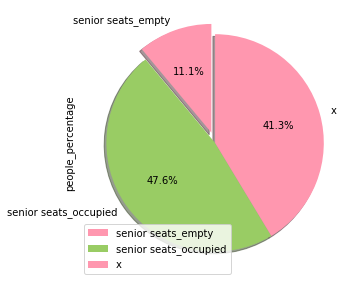

In [267]:
labels=['senior seats_empty', 'senior seats_occupied', 'x']
colors = ['#FF97AF', '#99CC64']
line1.plot.pie(labels = labels
                    ,colors= colors
                    ,startangle = 90
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0,0) 
                    ,y='people_percentage'
                    ,figsize=(5, 5))

In [311]:
oldage_oldageseat = table.loc[table['old_age'] == 1,'old_age_seat'].reset_index().groupby('old_age_seat')['old_age_seat'].count()

In [312]:
oldage_oldageseat

old_age_seat
0.0    48
1.0    52
Name: old_age_seat, dtype: int64

Text(0, 0.5, '')

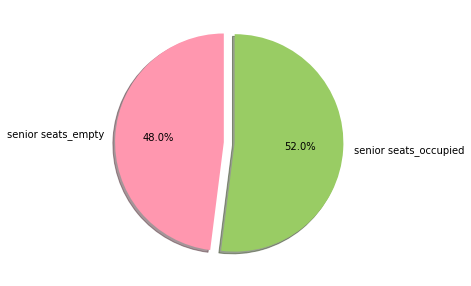

In [313]:
import pylab
labels=['senior seats_empty', 'senior seats_occupied']
colors = ['#FF97AF', '#99CC64']
oldage_oldageseat.plot.pie(labels = labels
                    ,colors= colors
                    ,startangle = 90
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0) 
                    ,figsize=(5, 5))
pylab.ylabel('')

In [314]:
pd.DataFrame(oldage_oldageseat).index.tolist()

[0.0, 1.0]

In [295]:
V = pd.DataFrame(index = {'crowdedness': ['E', 'N', 'F']}, cloumn = ['percentage'], data = [50,30,60])
V

TypeError: __init__() got an unexpected keyword argument 'cloumn'

In [317]:
d = pd.Series([50,30,60])

Text(0, 0.5, '')

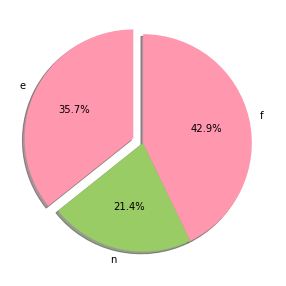

In [320]:
labels=['e', 'n', 'f']
colors = ['#FF97AF', '#99CC64']
d.plot.pie(labels = labels
                    ,colors= colors
                    ,startangle = 90
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0,0) 
                    ,subplots=True
                    ,figsize=(5, 5))
pylab.ylabel('')